In [1]:
import os, mne
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("../02_openDB/01_MESA/mesa-sleep-dataset-0.7.0.xlsx", index_col=0)

In [2]:
df_lite = df.loc[:, ['insmnia5', 'slpapnea5', 'rstlesslgs5', 'whiirs5c', 'qupleth5']]

In [ ]:
con_ins = df_lite.insmnia5 == 1
con_osa = df_lite.slpapnea5 == 1
con_rls = df_lite.rstlesslgs5 == 1
con_ins_pure = con_ins & (~con_osa) & (~con_rls)

print("N_clinical insomnia: {}".format(df_lite[con_ins].__len__()))
print("N_clinical osa: {}".format(df_lite[con_osa].__len__()))
print("N_clinical rls: {}".format(df_lite[con_rls].__len__()))

print("N_clinical insomnia without osa: {}".format(df_lite[con_ins & (~con_osa)].__len__()))
print("N_clinical insomnia without rls: {}".format(df_lite[con_ins & (~con_rls)].__len__()))
print("N_clinical insomnia without both osa and rls: {}".format(df_lite[con_ins_pure].__len__()))

con_quality = df_lite.qupleth5 == 5
print("N_clinical insomnia 'without both osa and rls' and with high signal quality: {}".format(df_lite[con_ins_pure & con_quality].__len__()))

# con_whiirs = df_lite.whiirs5c >= 9

# print("N clinical insomnia: {}".format(df_lite[con_insmnia].__len__()))
# print("N WHIIRS insomnia: {}".format(df_lite[con_whiirs].__len__()))
# print("N clinical or WHIIRS insomnia: {}".format(df_lite[con_whiirs | con_insmnia].__len__()))

N_clinical insomnia: 146
N_clinical osa: 199
N_clinical rls: 103
N_clinical insomnia without osa: 127
N_clinical insomnia without rls: 123
N_clinical insomnia without both osa and rls: 109
N_clinical insomnia 'without both osa and rls' and with high signal quality: 89


In [31]:
def add_zero_to_id(sub_id):
    i = 1000
    while 1:
        if (sub_id // i) >= 1:
            add_zeros = '0' * (3 - int(np.log10(i)))
            return f"{add_zeros}{sub_id}"
        else:
            i /= 10

def filt_and_plot(_edf, ax=None):
    _edf_filtered = _edf.copy().filter(0.5, 8, fir_design='firwin', verbose=False)
    data, times = _edf_filtered[:]

    idx_target = _edf.ch_names.index('Pleth')
    signal_target = data[idx_target]

    if ax is not None:
        ax.plot(-signal_target[305*256:315*256])
    else:
        plt.figure(figsize=(30, 10))
        plt.plot(-signal_target[305*256:315*256])


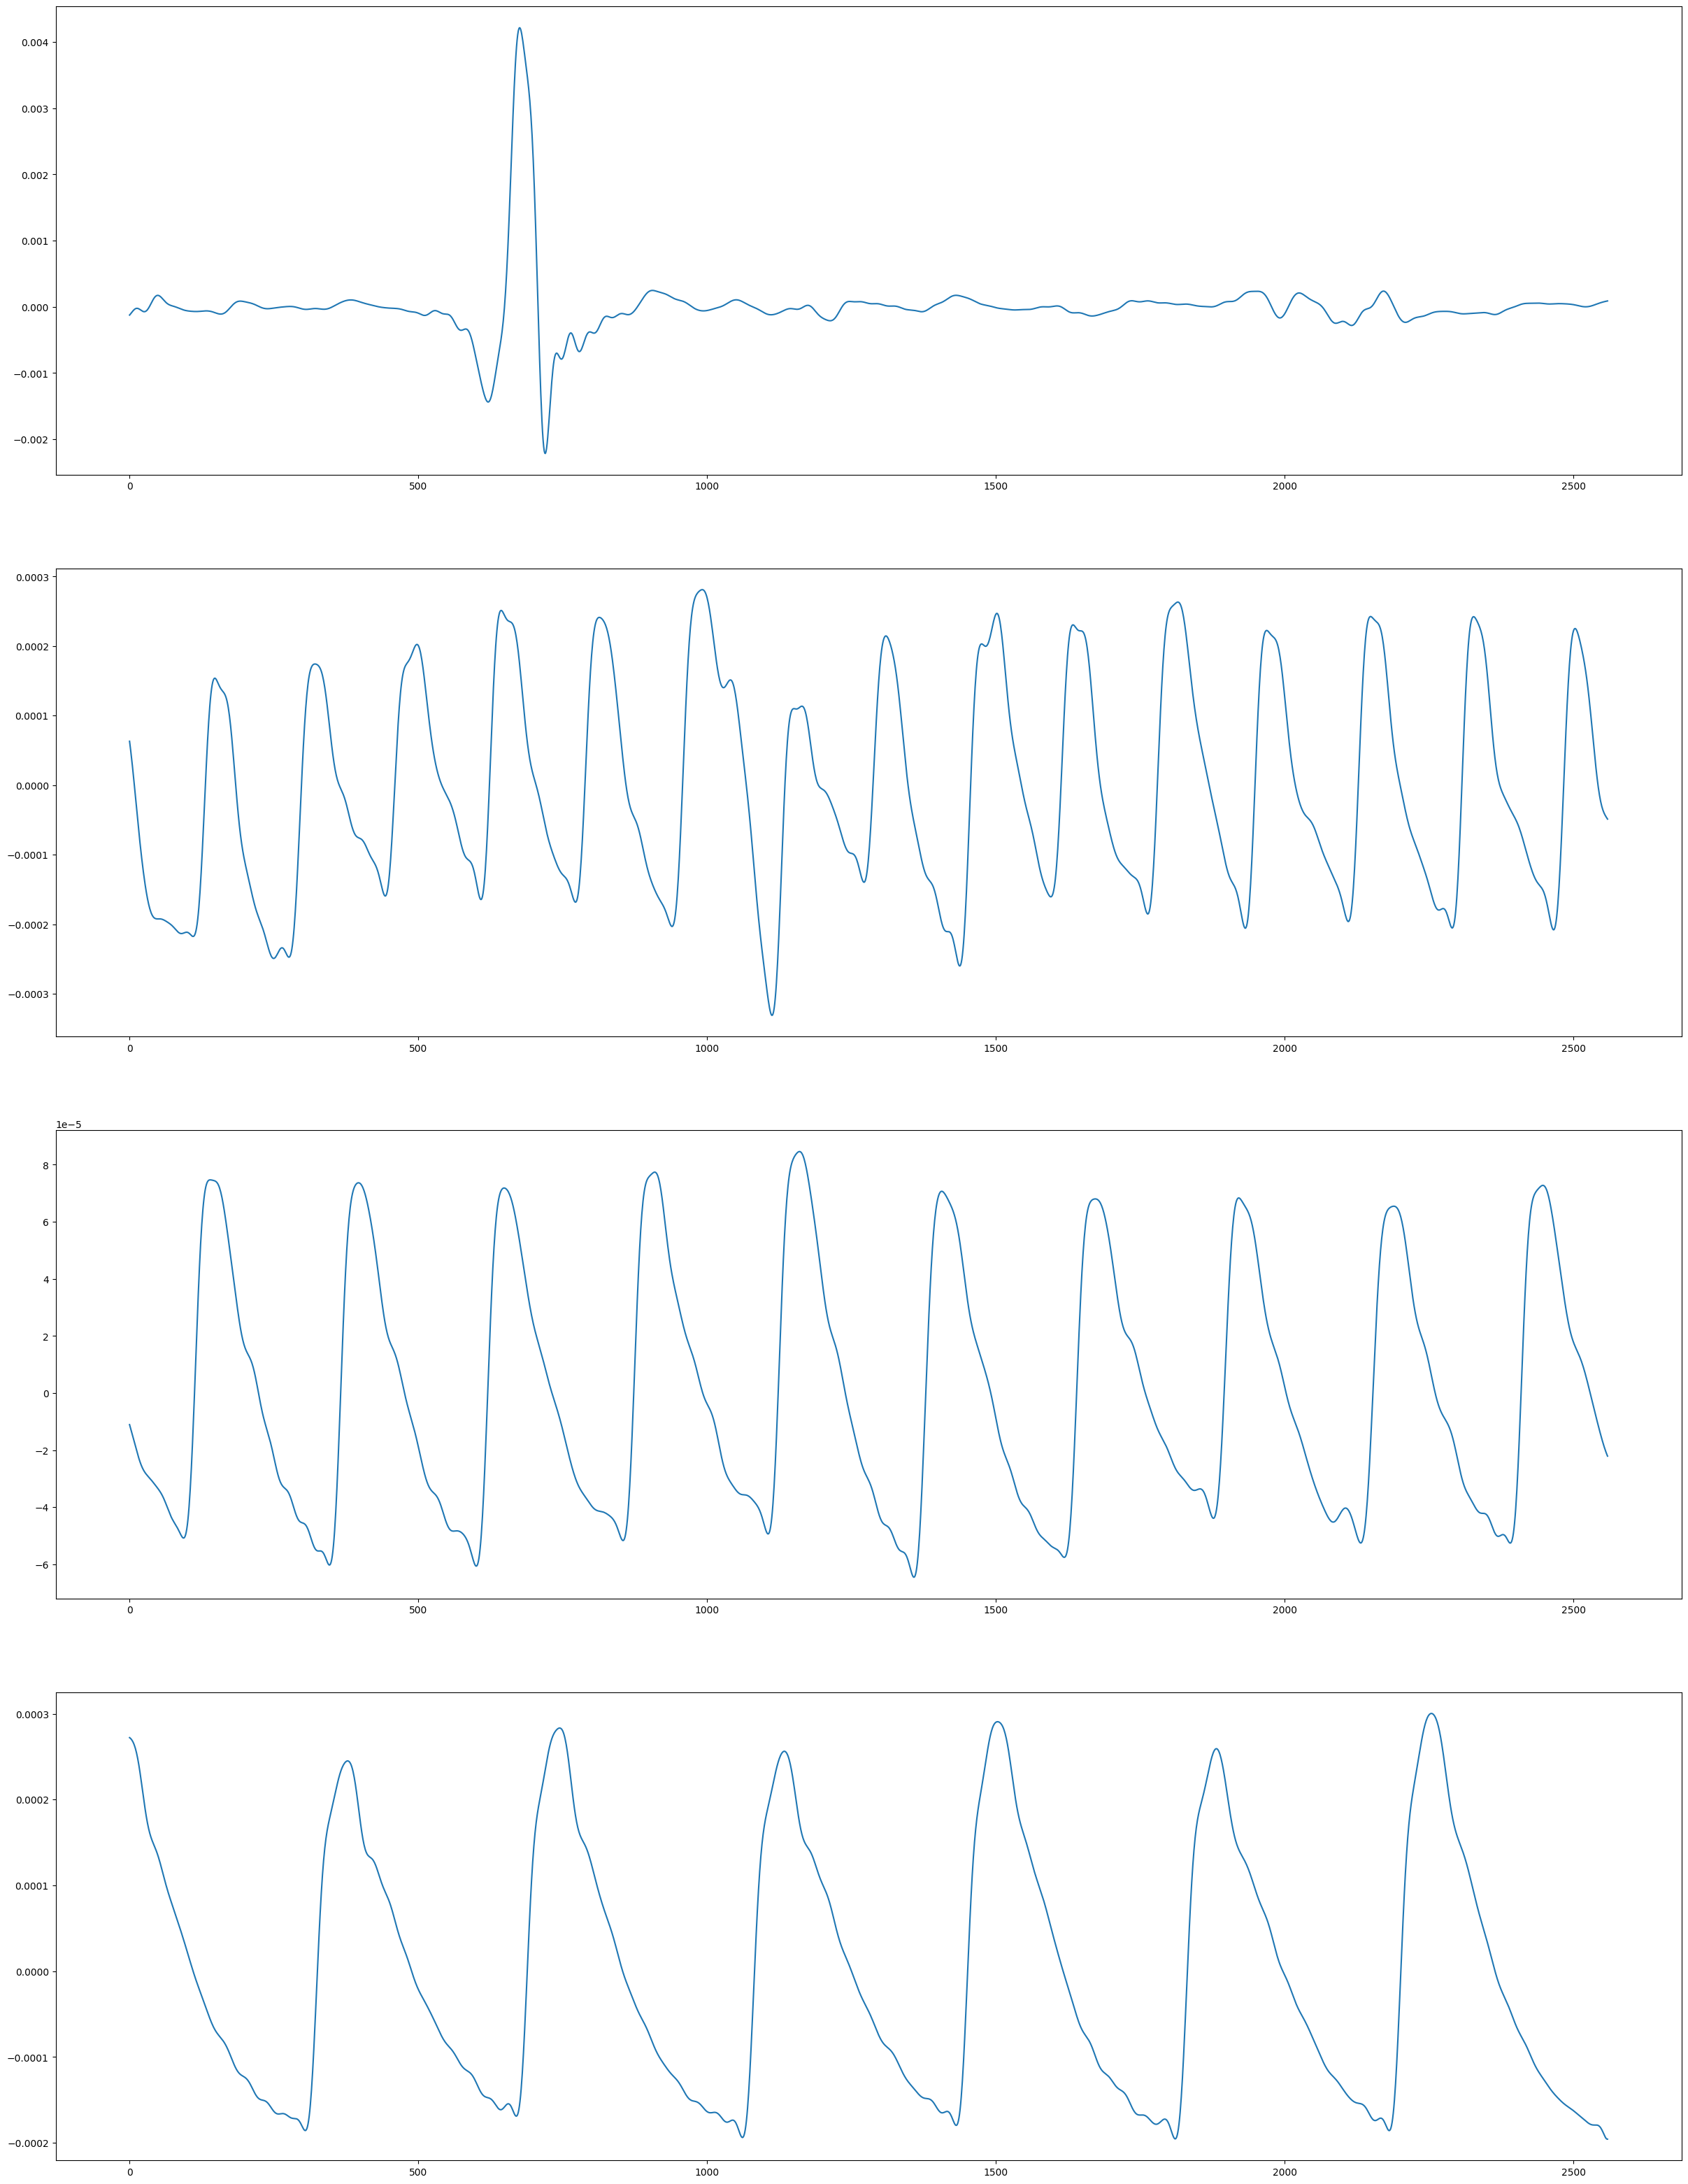

In [32]:
path = "../02_openDB/01_MESA/signal_quality_test"

fig, axs = plt.subplots(4, 1, figsize=(30, 40))
for order, i in enumerate(range(2, 6)):
    con_quality = df_lite.qupleth5 == i
    sub_id = df_lite[con_ins_pure & con_quality].index.to_list()[0]
    path_edf = os.path.join(path, "mesa-sleep-%s.edf" % add_zero_to_id(sub_id))
    _edf = mne.io.read_raw_edf(path_edf, preload=True, verbose=False) 
    filt_and_plot(_edf, ax=axs[order])

# _edf = mne.io.read_raw_edf(path_edf, preload=True, verbose=False) 



In [26]:
con_quality = df_lite.qupleth5 == 5
print(df_lite[con_ins_pure & con_quality])

        insmnia5  rstlesslgs5  slpapnea5  whiirs5c  qupleth5
mesaid                                                      
275          1.0          0.0        0.0       6.0       5.0
295          1.0          0.0        0.0      16.0       5.0
319          1.0          0.0        0.0      10.0       5.0
350          1.0          0.0        0.0      18.0       5.0
512          1.0          0.0        0.0      14.0       5.0
...          ...          ...        ...       ...       ...
6435         1.0          0.0        0.0      11.0       5.0
6566         1.0          0.0        0.0      11.0       5.0
6607         1.0          0.0        0.0       9.0       5.0
6686         1.0          0.0        0.0       5.0       5.0
6795         1.0          0.0        0.0       7.0       5.0

[89 rows x 5 columns]
